# Code for the project: Sentiment Analysis of Palestinian-Israeli Conflict

## Data scraper

In [ ]:
import praw
import pandas as pd
import datetime
import time

# Reddit API Credentials
client_id = '8e04u70nKE0-ngexk9BaCg'
client_secret = 'froUzXFs2j-QAUYiJFBInQigeYOH3A'
user_agent = 'Yijie_bot'

# Initialize PRAW
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

subreddit_name = "worldnews"  # Subreddit to scrape

def scrape_subreddit(subreddit_name):
    posts_data = []
    number = 0
    last_saved_number = 0

    subreddit = reddit.subreddit(subreddit_name)
    for submission in subreddit.new(limit=None):
        post_info = {
            "Title": submission.title,
            "Text": submission.selftext,
            "Timestamp": datetime.datetime.fromtimestamp(submission.created_utc).isoformat(),
            "Author": submission.author.name if submission.author else None,
            "Upvotes": submission.score,
            "Number of Comments": submission.num_comments,
            "URL": submission.url
        }
        posts_data.append(post_info)
        number += 1
        time.sleep(0.5)

        # Scrape comments
        submission.comments.replace_more(limit=None)
        for comment in submission.comments.list():
            comment_info = {
                "Title": "Comment",
                "Text": comment.body,
                "Timestamp": datetime.datetime.fromtimestamp(comment.created_utc).isoformat(),
                "Author": comment.author.name if comment.author else None,
                "Upvotes": comment.score,
                "Number of Comments": "Comment",
                "URL": submission.url
            }
            posts_data.append(comment_info)
            number += 1
            time.sleep(0.5)

        # Check if number has exceeded a multiple of 5000 since the last save
        if number // 5000 > last_saved_number // 5000:
            print(f"Scraped {number} data items.")
            df = pd.DataFrame(posts_data)
            csv_filename = f"{subreddit_name}_data_{number}.csv"
            df.to_csv(csv_filename, index=False)
            print(f"Data scraped and saved to {csv_filename}")
            last_saved_number = number

        time.sleep(10)  # Sleep to avoid hitting API rate limits

    return posts_data

data = scrape_subreddit(subreddit_name)
df = pd.DataFrame(data)
csv_filename = f"{subreddit_name}_data_final.csv"
df.to_csv(csv_filename, index=False)

print(f"Data scraped and saved to {csv_filename}")


'\n#!pip install praw\n\n# GUIDE\n# https://www.geeksforgeeks.org/how-to-get-client_id-and-client_secret-for-python-reddit-api-registration/\n# https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example\n\n# ACCOUNT\n# yijiebai@126.com\n# Doudou001\n# id: yijiebai2000\n\n# APPLICATION\n# name: Yijie\'s_bot\n\nimport praw\nimport pandas as pd\nimport datetime\nimport time\n\n# Reddit API Credentials\nclient_id = \'8e04u70nKE0-ngexk9BaCg\'\nclient_secret = \'froUzXFs2j-QAUYiJFBInQigeYOH3A\'\nuser_agent = \'Yijie_bot\'\n\n# Initialize PRAW\nreddit = praw.Reddit(\n    client_id=client_id,\n    client_secret=client_secret,\n    user_agent=user_agent\n)\n\nsubreddit_name = "worldnews"  # Subreddit to scrape\n\ndef scrape_subreddit(subreddit_name):\n    posts_data = []\n    number = 0\n    last_saved_number = 0\n\n    subreddit = reddit.subreddit(subreddit_name)\n    for submission in subreddit.new(limit=None):\n        post_info = {\n            "Title": submission.title,\n    

# Data cleaning

**basic cleaning procedure**

In [ ]:
# Install necessary packages
# !pip install pandas numpy scikit-learn nltk matplotlib seaborn

import pandas as pd

# Load the data
data = pd.read_csv("worldnews_data_4770_19:55:2.csv")

# View the first few rows of the data
print(data.head())

import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Function to clean text data
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Replace NaN values in 'Text' with the corresponding 'Title'
data['Text'] = data.apply(lambda row: row['Title'] if pd.isna(row['Text']) else row['Text'], axis=1)

# Process missing values
data.fillna({'Title': 'Unknown', 'Text': 'Unknown', 'Author': 'Unknown'}, inplace=True)
data.dropna(subset=['Upvotes', 'Number of Comments', 'Timestamp'], inplace=True)

# Change 'Number of Comments' values that are 'Comment' to 0
data['Number of Comments'] = data['Number of Comments'].replace('Comment', 0)

# Ensure 'Number of Comments' column is of integer data type
data['Number of Comments'] = data['Number of Comments'].astype(int)

# timestamp process
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Clean 'Title' and 'Text' columns
data['Cleaned_Title'] = data['Title'].apply(clean_text)
data['Cleaned_Text'] = data['Text'].apply(clean_text)

print(data[['Cleaned_Title', 'Cleaned_Text']].head())

                                               Title  \
0  Exposed: How Hamas steals fuel from Gaza's hos...   
1                                            Comment   
2                                            Comment   
3                                            Comment   
4                                            Comment   

                                                Text            Timestamp  \
0                                                NaN  2023-11-01T15:33:37   
1  When the entirety of infrastructure in Gaza, h...  2023-11-01T15:38:45   
2            No, silly, Israelis are the monsters...  2023-11-01T15:46:02   
3  People truly do not understand how sick Hamas ...  2023-11-01T15:45:27   
4                              Oh shit wrong sub huh  2023-11-01T15:46:43   

            Author  Upvotes Number of Comments  \
0    everybodydumb       20                  5   
1     Hk-Neowizard        1            Comment   
2  StrangerFew2424        1            Comment   


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zs_jin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                              Cleaned_Title  \
0  exposed hamas steals fuel gaza hospitals   
1                                   comment   
2                                   comment   
3                                   comment   
4                                   comment   

                                        Cleaned_Text  
0           exposed hamas steals fuel gaza hospitals  
1  entirety infrastructure gaza hospitals schools...  
2                            silly israelis monsters  
3  people truly understand sick hamas must elimin...  
4                              oh shit wrong sub huh  


**Descriptive statistics**

In [ ]:
import pandas as pd

# Basic statistical information
print("Basic Statistical Information:")
print(data.describe())

# Statistics for numerical data
print("\nStatistics for Upvotes:")
print(data['Upvotes'].describe())

print("\nStatistics for Number of Comments:")
print(data['Number of Comments'].describe())

# Frequency statistics for categorical data
print("\nAuthor Posting Frequency:")
print(data['Author'].value_counts())

# Check for missing values
print("\nMissing Values Statistics:")
print(data.isnull().sum())


Basic Statistical Information:
            Upvotes  Number of Comments
count   4770.000000         4770.000000
mean      24.407338            1.331866
std      307.037543           73.494593
min      -90.000000            0.000000
25%        1.000000            0.000000
50%        1.000000            0.000000
75%        5.000000            0.000000
max    16442.000000         5057.000000

Statistics for Upvotes:
count     4770.000000
mean        24.407338
std        307.037543
min        -90.000000
25%          1.000000
50%          1.000000
75%          5.000000
max      16442.000000
Name: Upvotes, dtype: float64

Statistics for Number of Comments:
count    4770.000000
mean        1.331866
std        73.494593
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5057.000000
Name: Number of Comments, dtype: float64

Author Posting Frequency:
Unknown             96
saarlv44            36
Goldreaver          28
Stormayqt           28
Eldanon       

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


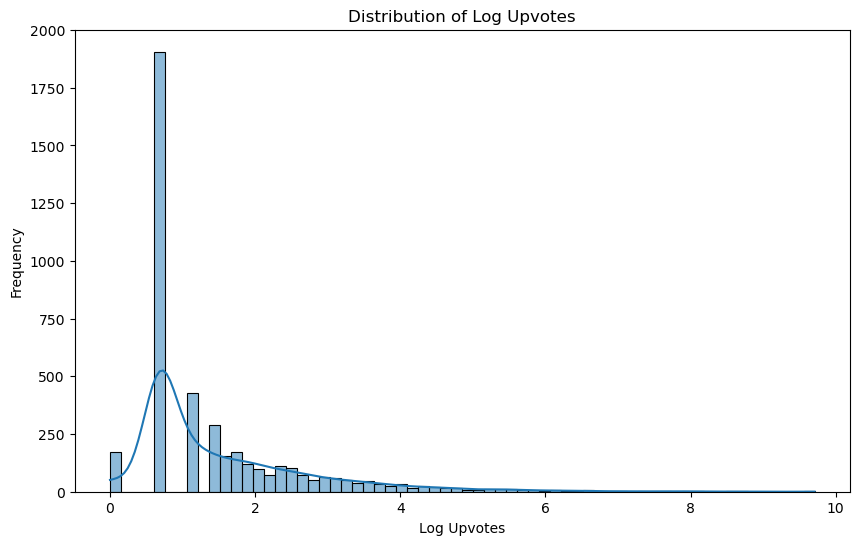

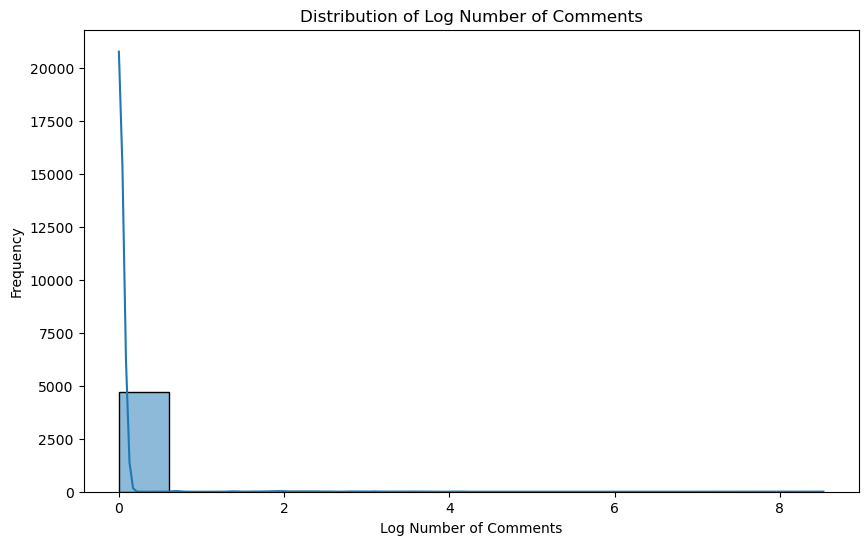

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the 'Upvotes' and 'Number of Comments' columns to log scale to deal with the skewness
# Add 1 before taking the log to avoid log(0)
data['Log_Upvotes'] = np.log(data['Upvotes'] + 1)
data['Log_Number_of_Comments'] = np.log(data['Number of Comments'] + 1)

# Visualization
# Distribution of Log Upvotes
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Upvotes'], kde=True)
plt.title('Distribution of Log Upvotes')
plt.xlabel('Log Upvotes')
plt.ylabel('Frequency')
plt.show()

# Distribution of Log Number of Comments
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Number_of_Comments'], kde=True)
plt.title('Distribution of Log Number of Comments')
plt.xlabel('Log Number of Comments')
plt.ylabel('Frequency')
plt.show()


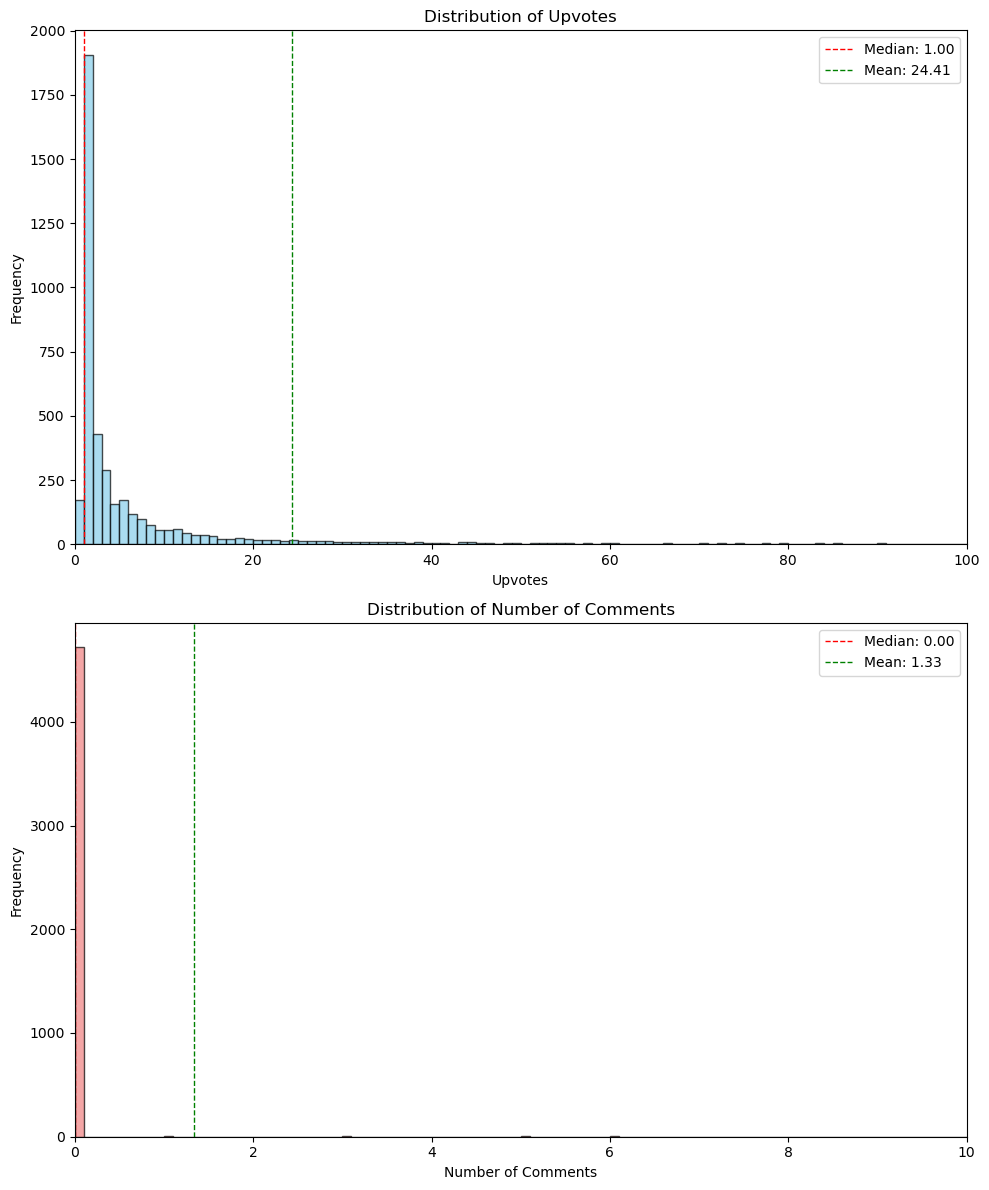

I don't think the second picture is useful


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a new figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot histograms for the two data points

# 1. Plot for Upvotes
axs[0].hist(data['Upvotes'], bins=100, range=(0, 100), cumulative=False, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].set_xlim([0, 100])  # Set x-axis limit to 1000 for Upvotes

# Add median and mean lines for Upvotes
median_upvotes = np.median(data['Upvotes'])
mean_upvotes = np.mean(data['Upvotes'])
axs[0].axvline(median_upvotes, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_upvotes:.2f}')
axs[0].axvline(mean_upvotes, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_upvotes:.2f}')
axs[0].set_title('Distribution of Upvotes')
axs[0].set_xlabel('Upvotes')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# 2. Plot for Number of Comments
axs[1].hist(data['Number of Comments'], bins=100, range=(0, 10), cumulative=False, color='lightcoral', edgecolor='black', alpha=0.7)
axs[1].set_xlim([0, 10])  # Set x-axis limit to 100 for Number of Comments

# Add median and mean lines for Number of Comments
median_comments = np.median(data['Number of Comments'])
mean_comments = np.mean(data['Number of Comments'])
axs[1].axvline(median_comments, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_comments:.2f}')
axs[1].axvline(mean_comments, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_comments:.2f}')
axs[1].set_title('Distribution of Number of Comments')
axs[1].set_xlabel('Number of Comments')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()
print("I don't think the second picture is useful")

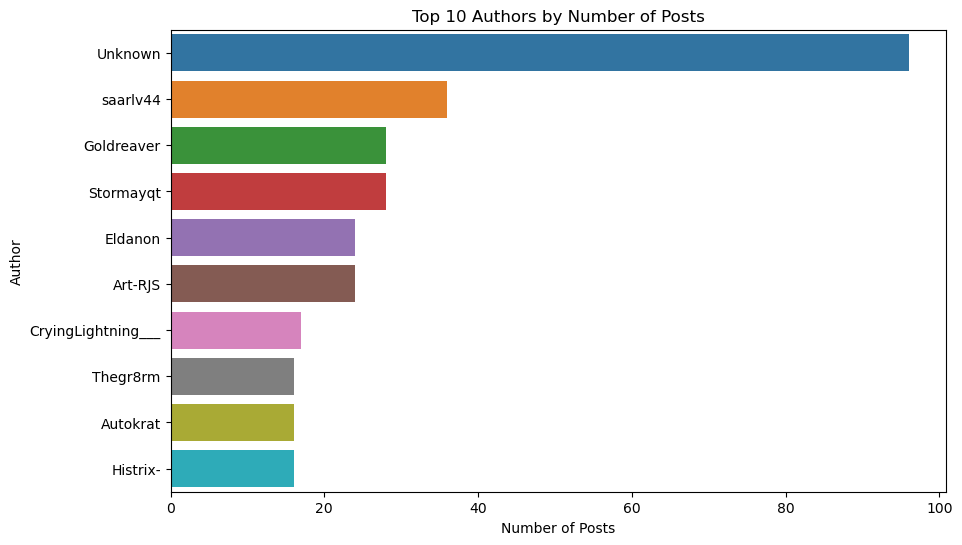

In [ ]:
# Distribution of posts by authors
author_counts = data['Author'].value_counts().head(10)  # Select the top 10 most active authors
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.values, y=author_counts.index)
plt.title('Top 10 Authors by Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Author')
plt.show()

# Modeling

**Data vectorization**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000) 

title_bow = vectorizer.fit_transform(data['Cleaned_Title'])
text_bow = vectorizer.fit_transform(data['Cleaned_Text'])

print(title_bow.shape, text_bow.shape)

(4770, 401) (4770, 1000)


**spliting data for random forest regression**

In [ ]:
from sklearn.model_selection import train_test_split


X = text_bow
y = data['Upvotes'] # using upvotes as the prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Baseline: Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 314778.2127644069


Fitting the best random forest model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/zs_jin/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/zs_jin/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the d

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
best_rf = grid_search.best_estimator_

best_predictions = best_rf.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
print(f"Improved Mean Squared Error: {best_mse}")

Improved Mean Squared Error: 313066.10997149453


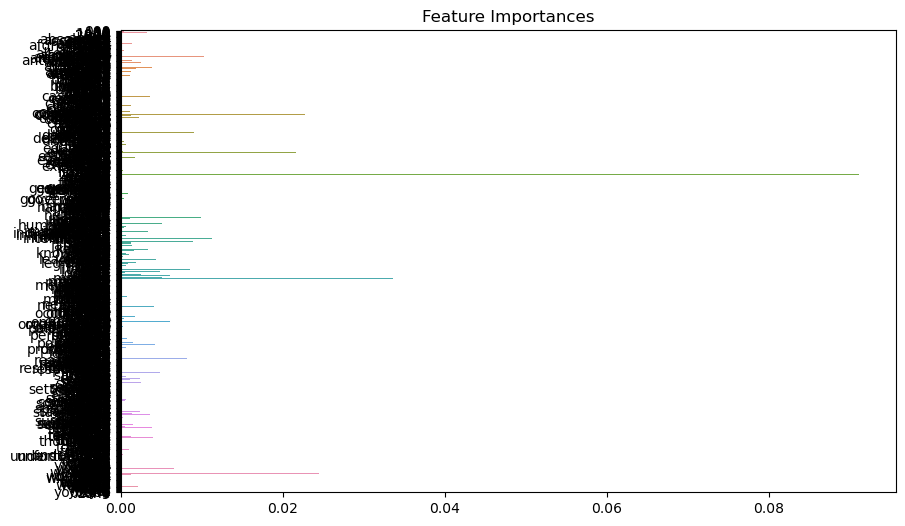

In [ ]:
feature_importances = best_rf.feature_importances_

# visualizing feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=vectorizer.get_feature_names_out())
plt.title('Feature Importances')
plt.show()

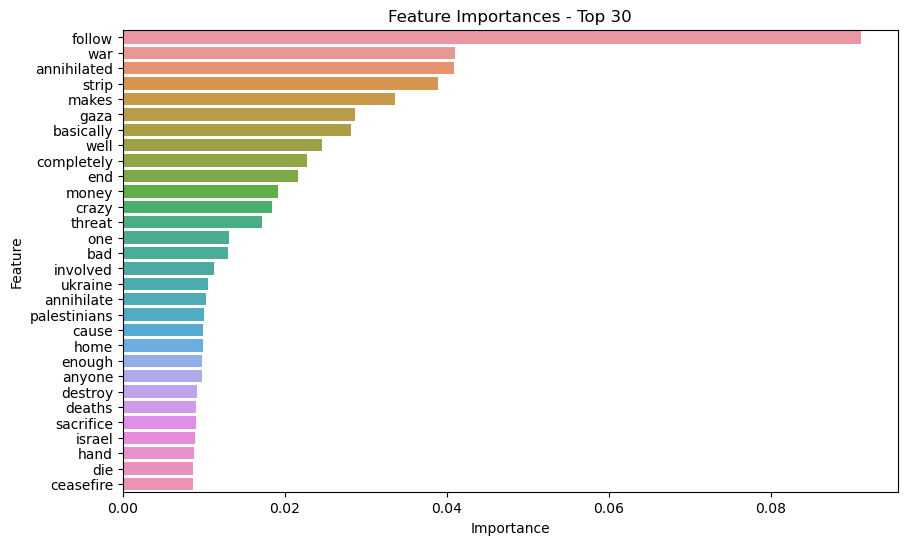

In [ ]:
# feature importance
feature_importances = best_rf.feature_importances_

# get feature names
feature_names = vectorizer.get_feature_names_out()

# combine feature names and importance into a dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(30)

# visualizing top 30 important features
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Feature Importances - Top 30')
plt.show()

## Using sentiment analyzer from TextBlob to get the preliminary analysis

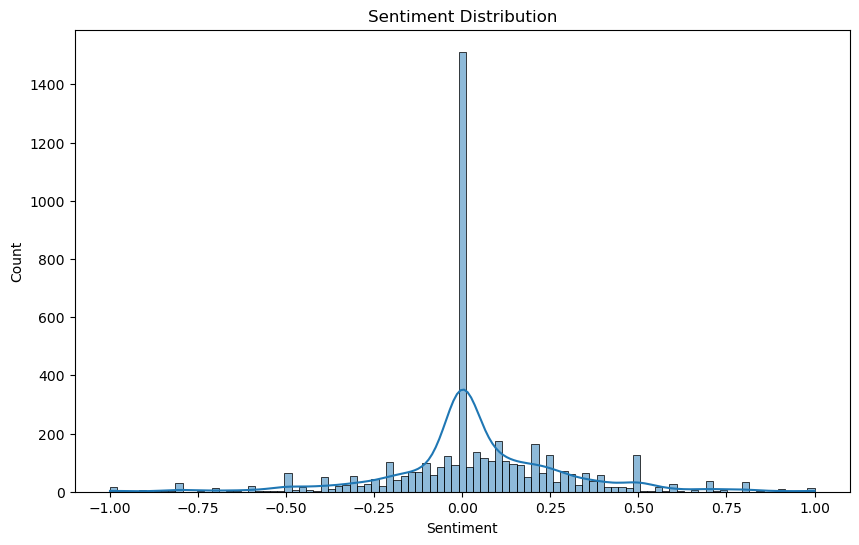

In [ ]:
#!pip install textblob
from textblob import TextBlob

data['Sentiment'] = data['Cleaned_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# visualization of the sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Sentiment'], kde=True)
plt.title('Sentiment Distribution')
plt.show()

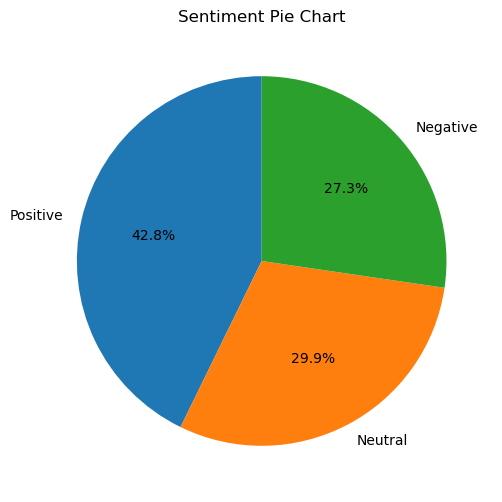

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# apping sentiment label to float sentiment
data['Sentiment_Label'] = data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# pie chart
sentiment_counts = data['Sentiment_Label'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Pie Chart')
plt.ylabel('')
plt.show()


    support         itemsets
0  0.262055          (hamas)
1  0.234172         (israel)
2  0.121174           (like)
3  0.165199         (people)
4  0.100629          (would)
5  0.118868  (israel, hamas)


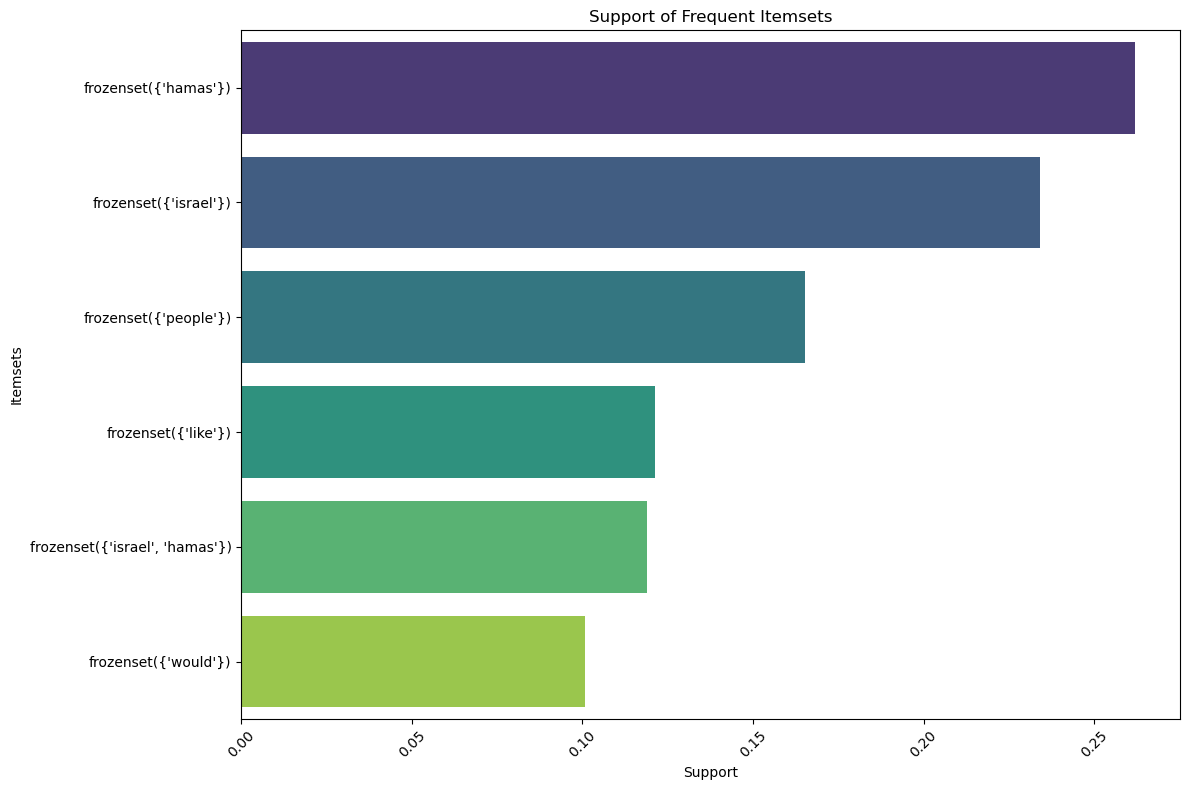

In [ ]:
#Frequent Pattern Mining, Apriori

# !pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


# Example of creating transactions (This is just a basic example. You'll need to adjust based on your specific use case)
transactions = data['Cleaned_Text'].apply(lambda x: x.split())

# Encoding transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print(frequent_itemsets)



#visualize
import matplotlib.pyplot as plt
import seaborn as sns


frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(y=frequent_itemsets['itemsets'].astype(str), x=frequent_itemsets['support'], palette='viridis')
plt.title('Support of Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

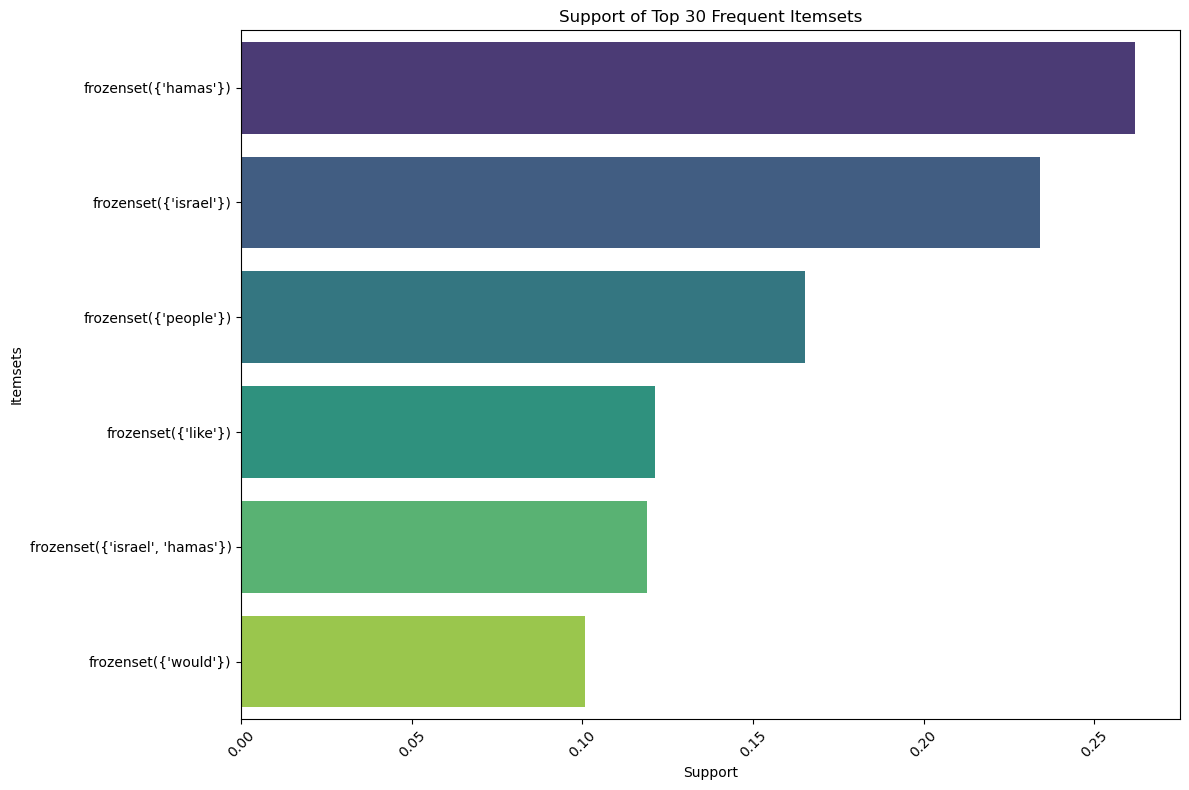

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


top_30_itemsets = frequent_itemsets.nlargest(30, 'support')


plt.figure(figsize=(12, 8))
sns.barplot(y=top_30_itemsets['itemsets'].astype(str), x=top_30_itemsets['support'], palette='viridis')
plt.title('Support of Top 30 Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Training a model to identify the political stance using XLNet

### Necessary imports

In [ ]:
# !pip install transformers
# !pip install -q -U watermark
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

import transformers
from transformers import XLNetTokenizer, XLNetModel, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from pylab import rcParams

from torch import nn, optim
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset,RandomSampler,SequentialSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.12.0

numpy       : 1.24.3
pandas      : 1.5.3
torch       : 2.0.1
transformers: 4.29.2



/Users/zs_jin/anaconda3/lib/python3.11/site-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


device(type='cpu')

## Stance matching

Applying LDA to label the examples and select the ones that are on the Palestine Israel conflict.
Please note that since we are utilizing the post-comment structure, we have to adjust the dataframe first.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# adjust the data frame so that the title of comments would be the titles of the posts to which they belong

current_post_title = None

for index, row in data.iterrows():
    if row['Cleaned_Title'] != 'comment':
        current_post_title = row['Cleaned_Title']
    else:
        data.at[index, 'Cleaned_Title'] = current_post_title

#Applying LDA

vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5,
                                min_df = 10)
vectorized_titles = vectorizer.fit_transform(data['Cleaned_Title'])

n_topics = 15

lda = LatentDirichletAllocation(n_components=n_topics)  # Number of topics
lda.fit(vectorized_titles)

doc_topic = lda.transform(vectorized_titles)
topic_labels = doc_topic.argmax(axis=1)
data['topic'] = topic_labels

# Display LDA results and select the related texts

n_top_words = 8

def get_related_topic_indices(model, feature_names, n_top_words):
    related_topics=[]
    keywords= ['palestine', 'palestinian', 'gaza', 'israel', 'israeli', 'zionist', 'idf', 'hamas']
    for topic_idx, topic in enumerate(model.components_):
        top_words = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(f"Topic {topic_idx}:")
        print(top_words)
        if any(keyword in top_words for keyword in keywords):
            related_topics.append(int(topic_idx))
    return related_topics

related_topics = get_related_topic_indices(lda, vectorizer.get_feature_names_out(), n_top_words)
print(related_topics)
relevant_data = data[data['topic'].isin(related_topics)]

# !pip install pandas nltk gensim
from gensim.corpora import Dictionary

# create dictionary
titles = data['Cleaned_Title'].to_list()
titles = list(set(titles))

from nltk.tokenize import word_tokenize
def tokenize_lowercase_stopword(tweets):
    res = []
    for tweet in tweets:
        tmp = [word for word in word_tokenize(tweet)]
        res.append(tmp)
    return res

titles = tokenize_lowercase_stopword(titles)

text_dict = Dictionary(titles)
# generate bag-of-word format data
title_bow_2 = [text_dict.doc2bow(title) for title in titles]

# !pip install pyLDAvis
from gensim.models.ldamodel import LdaModel
lda_2 = LdaModel(corpus=title_bow_2,num_topics=n_topics, id2word = text_dict, passes=10,random_state=None)

Topic 0:
gaza american killed relatives day single family mourns
Topic 1:
president deal offer putin ramaswamy spoke war russia
Topic 2:
group gaza hideout video terrorists hospital confirm interrogation
Topic 3:
korea says russia south artillery shells shipped north
Topic 4:
humanitarian selectively carte law applied int menu gaza
Topic 5:
bolivia recall ambassadors dipolmatic ties severs colombia chile
Topic 6:
gps russia ukraine guided bomb set hit jammer
Topic 7:
war reports accuses media crimes freedom deaths journalists
Topic 8:
global leaders warn cause harm catastrophic tanzania german
Topic 9:
idf hospitals gazan releases proof stealing gas tel
Topic 10:
faces iran russia war worldnews crisis live thread
Topic 11:
israeli government sex legislation fallen partners advances soldiers
Topic 12:
thread worldnews live crisis russia iran war exit
Topic 13:
ukraine refugees killed reports russia iran war worldnews
Topic 14:
lgbtq images hungary exhibition bans teens display iran
[0, 

## visualizing LDA

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_2, title_bow_2, lda_2.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.074645 -0.145078       1        1  10.762564
12     0.114901 -0.063880       2        1  10.133159
9     -0.091413 -0.070781       3        1   9.737687
10     0.127832  0.022690       4        1   9.506513
6     -0.062869  0.134834       5        1   9.278567
14    -0.010169 -0.055543       6        1   8.883492
3     -0.085248  0.081734       7        1   8.562753
1      0.106338  0.032403       8        1   7.149972
4      0.039927 -0.000934       9        1   6.283120
2     -0.033740  0.037335      10        1   6.088310
7     -0.002360 -0.028782      11        1   5.102578
13     0.005801  0.026909      12        1   3.099986
11    -0.014304  0.015173      13        1   2.865982
0     -0.009651  0.011349      14        1   1.881505
8     -0.010398  0.002573      15        1   0.663812, topic_info=          Term      Freq     Total Category  logprob  loglift
45      israel  5.000000  5.000000  Default  30.0000  30.0000
15      russia  3.000000  3.000000  Default  29.0000  29.0000
90        gaza  6.000000  6.000000  Default  28.0000  28.0000
29       hamas  5.000000  5.000000  Default  27.0000  27.0000
117      faces  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
25      surfer  0.008244  1.110060  Topic15  -6.0039   0.1123
26   suspected  0.008244  1.110059  Topic15  -6.0039   0.1123
27        anti  0.008244  1.132467  Topic15  -6.0039   0.0923
28   commander  0.008244  1.132467  Topic15  -6.0039   0.0923
29       hamas  0.008244  5.508240  Topic15  -6.0039  -1.4895

[625 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
378       9  0.946293        118
65       10  0.953176       180m
193       5  0.875236        1bn
297       8  0.931302       2023
345       4  0.876395       2024
...     ...       ...        ...
303       8  0.931302  worldnews
109       1  0.864806      would
95        3  0.565682    wounded
384       9  0.946293       year
119      11  0.994852      years

[403 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 13, 10, 11, 7, 15, 4, 2, 5, 3, 8, 14, 12, 1, 9])

Now that we've got the relevant data, we're going to do the sentiment analysis.
However, since we don't have enough manually labeled data to train a transformer to classify whether a text is "pro-Palestine", "pro-Israel", or "Neutral", we have to make a roundabout.

To get the general sentiment for the two sides on this sub, we can just train a model to evaluate whether the incident described in the title is something that is in favor of either side, and then doing sentiment analysis on comments, to get the stance of one post. The rasionale behind this is that, in normal sentiment analysis, the information in the post-comment-comment structure is not fully utilized. In our case, if one event is beneficial for Israel, then the negtive response of the commonts would signal a general stance for Palestine, which is very intuitive.

To achieve this, we need manually label event-favored_side pairs. Then we use the data to fine-tune a XLNet to classify all titles. Once we classified all the titles in our data base, we then use vadersentiment to get the sentiment of each comment and weight the sentiment on it's upvote and adding them together to get a general stance for a post. By collecting all the stances of posts we can see the general sentiments towrads both sides of the conflict in this huge subreddit.

## preliminary results

**Here we trained a SVM using the corpus provided to classify three sentiments and implemented the SVM to the corpus where unrelated posts were filtered out to get the sentiment of each text.**

generating "ground truth" from vaderSentiment package

In [ ]:
# !pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

def assign_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

analyzer = SentimentIntensityAnalyzer()
data['Sentiment_Label'] = data['Cleaned_Text'].apply(lambda x: assign_sentiment(analyzer.polarity_scores(x)['compound']))



# Training on the whole corpus

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_Text'], data['Sentiment_Label'], test_size=0.2)

# Vectorization
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5,
                                min_df = 10)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SVM Classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred = svm.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# applying the cleaned corpus to the SVM

analyzer = SentimentIntensityAnalyzer()
relevant_data['Sentiment_Label'] = relevant_data['Cleaned_Text'].apply(lambda x: assign_sentiment(analyzer.polarity_scores(x)['compound']))

# X_, X_toss, y_, y_toss = train_test_split(relevant_data['Cleaned_Text'], relevant_data['Sentiment'], test_size=0.01)


X_tfidf = vectorizer.transform(relevant_data['Cleaned_Text'])


y_pred_re = svm.predict(X_tfidf)
relevant_data['Sentiment_Label']= y_pred_re

              precision    recall  f1-score   support

    Negative       0.78      0.75      0.77       424
     Neutral       0.60      0.78      0.68       192
    Positive       0.76      0.67      0.71       338

    accuracy                           0.73       954
   macro avg       0.71      0.73      0.72       954
weighted avg       0.74      0.73      0.73       954



/var/folders/0v/5332h4d15q7cn_5xwjtkv2840000gn/T/ipykernel_25951/2436496849.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['Sentiment_Label'] = relevant_data['Cleaned_Text'].apply(lambda x: assign_sentiment(analyzer.polarity_scores(x)['compound']))
/var/folders/0v/5332h4d15q7cn_5xwjtkv2840000gn/T/ipykernel_25951/2436496849.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['Sentiment_Label']= y_pred_re


### preliminary results of the sentiment analysis

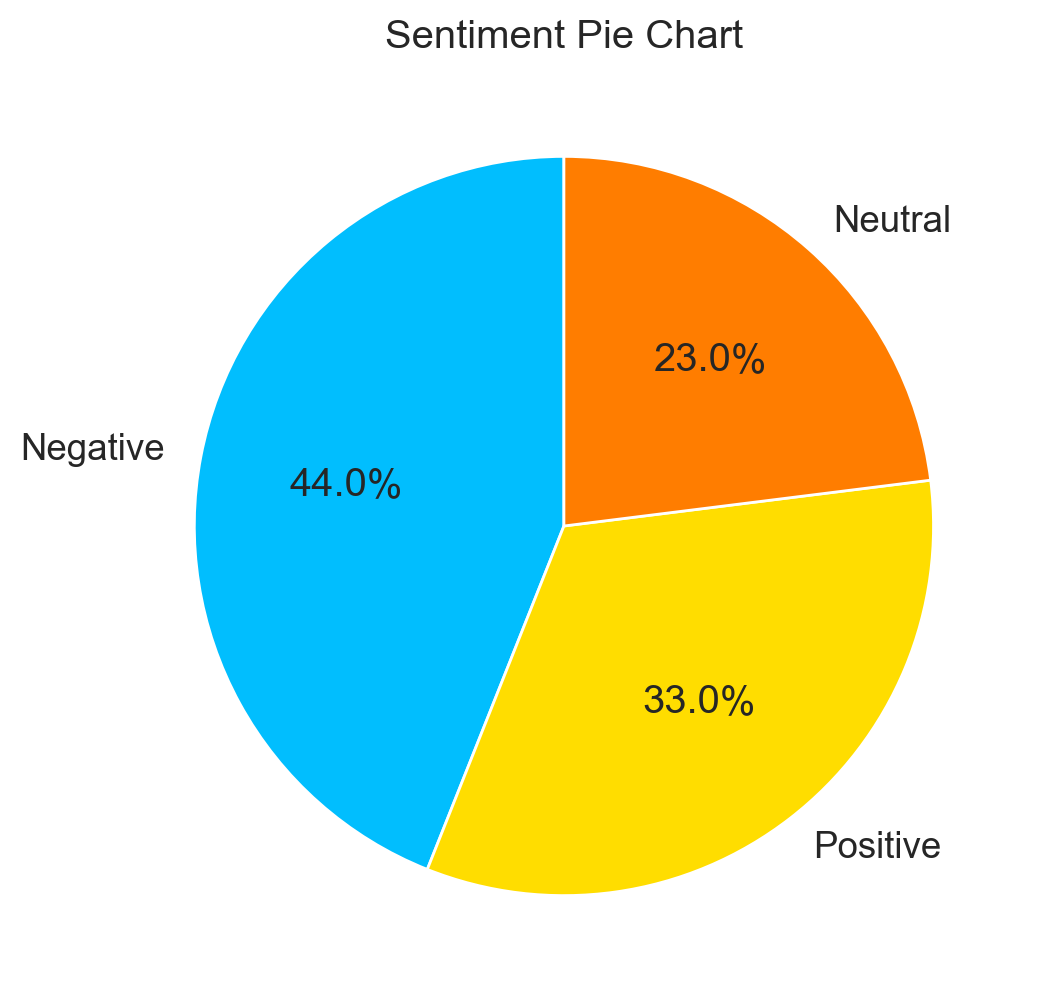

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = relevant_data

sentiment_counts = df['Sentiment_Label'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Pie Chart')
plt.ylabel('')
plt.show()

## Training a XLNet on telling whether an event is in favor of Palestine or Israel or Neutral.

**Loading manually annotated data set**

In [ ]:
ps = pd.read_csv('post_stance.csv')
ps.head()

,post,favors
0,IDF on shooting from Yemen: 'Iran-backed milit...,Israel
1,Israel agrees to allow 100 trucks of humanitar...,Palestine
2,Israel restored Gaza's internet under U.S. pre...,Neutral
3,U.S. asked Israel to release withheld Palestin...,Palestine
4,Israeli Govt. Denies Rolling Stone a Press Cre...,Israel


In [ ]:
from sklearn.utils import shuffle
ps = shuffle(ps)

In [ ]:
def stance2label(stance):
    if stance == "Palestine":
        return 2
    elif stance == "Neutral":
        return 1
    else:
        return 0

ps['favors'] = ps['favors'].apply(stance2label)

In [ ]:
ps['favors'].value_counts()

0    39
1    33
2    33
Name: favors, dtype: int64

**evaluating the maximum length of the tokens**

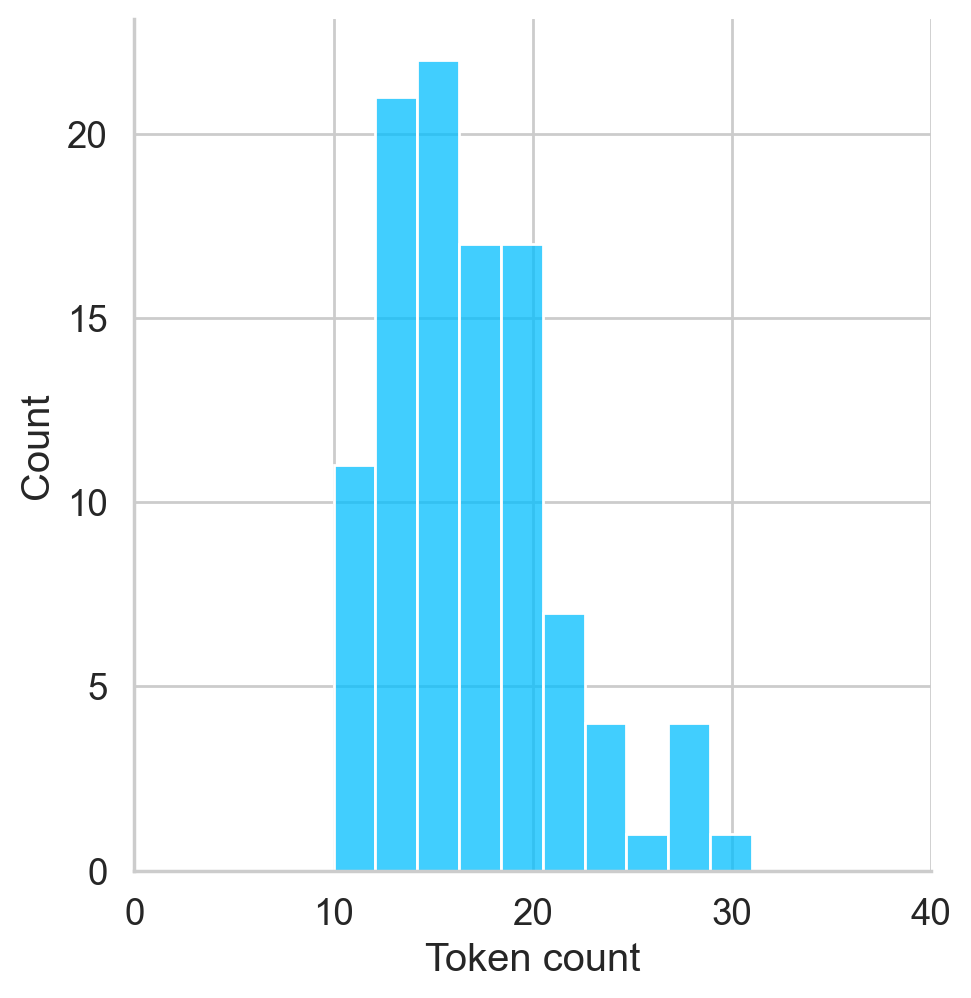

In [ ]:
from transformers import XLNetTokenizer, XLNetModel
PRE_TRAINED_MODEL_NAME = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


# token length distribution

token_lens = []

for txt in ps['post']:
  tokens = tokenizer.encode(txt, max_length=512, truncation=True)
  token_lens.append(len(tokens))

sns.displot(token_lens)
plt.xlim([0, 40]);
plt.xlabel('Token count');

**Setting data configuration**

In [ ]:
MAX_LEN = 40
BATCH_SIZE = 4
class_names = ['Israel', 'Neutral', 'Palestine']

In [ ]:
from transformers import PreTrainedTokenizer

class PostDataset(Dataset):

    def __init__(self, reports, targets, tokenizer: PreTrainedTokenizer, max_len):
        self.reports = reports
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reports)

    def __getitem__(self, item):
        report = str(self.reports[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
            report,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',  # Enable padding
            return_attention_mask=True,
            return_tensors='pt',  # Returns PyTorch tensors
        )

        # No need for extra pad_sequences or tensor conversion
        input_ids = encoding['input_ids'].squeeze()  # Remove extra dimension
        attention_mask = encoding['attention_mask'].squeeze()

        return {
            'post_text': report,
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'targets': torch.tensor(target, dtype=torch.long)
        }


In [ ]:
ps_train, ps_test = train_test_split(ps, test_size=0.5, random_state=101)
ps_val, ps_test = train_test_split(ps_test, test_size=0.5, random_state=101)

In [ ]:
ps_train.shape, ps_val.shape, ps_test.shape

((52, 2), (26, 2), (27, 2))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = PostDataset(
    reports=ps['post'].to_numpy(),
    targets=ps['favors'].to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=0,
    shuffle=True,
    drop_last=True
  )

In [ ]:
train_data_loader = create_data_loader(ps_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(ps_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(ps_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
from transformers import XLNetForSequenceClassification
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels = 3)
model = model.to(device)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.bias', 'sequence_summary.summary.weight', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Pre-trained Model:

In [ ]:
model

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

**Setting training parameters**

In [ ]:
EPOCHS = 10

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
                                {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay':0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

/Users/zs_jin/anaconda3/lib/python3.11/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
data = next(iter(val_data_loader))
data.keys()

dict_keys(['post_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
targets = data['targets'].to(device)
print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([4, 40])
torch.Size([4, 40])


## Training and evaluation function

In [ ]:

from sklearn import metrics
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    acc = 0
    counter = 0

    for d in data_loader:
        input_ids = d["input_ids"].reshape(4,MAX_LEN).to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)
        loss = outputs[0]
        logits = outputs[1]

        # preds = preds.cpu().detach().numpy()
        _, prediction = torch.max(outputs[1], dim=1)
        targets = targets.cpu().detach().numpy()
        prediction = prediction.cpu().detach().numpy()
        accuracy = metrics.accuracy_score(targets, prediction)

        acc += accuracy
        losses.append(loss.item())

        loss.backward()

        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        counter = counter + 1

    return acc / counter, np.mean(losses)

def eval_model(model, data_loader, device, n_examples):
    model = model.eval()
    losses = []
    acc = 0
    counter = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].reshape(4,MAX_LEN).to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)
            loss = outputs[0]
            logits = outputs[1]

            _, prediction = torch.max(outputs[1], dim=1)
            targets = targets.cpu().detach().numpy()
            prediction = prediction.cpu().detach().numpy()
            accuracy = metrics.accuracy_score(targets, prediction)

            acc += accuracy
            losses.append(loss.item())
            counter += 1

    return acc / counter, np.mean(losses)


## Training

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        optimizer,
        device,
        scheduler,
        len(ps_train)
    )

    print(f'Train loss {train_loss} Train accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        device,
        len(ps_val)
    )

    print(f'Val loss {val_loss} Val accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'xlnet_model.bin')
        best_accuracy = val_acc


Epoch 1/10
----------
Train loss 1.159834792980781 Train accuracy 0.3173076923076923
Val loss 1.0333926310906043 Val accuracy 0.3173076923076923

Epoch 2/10
----------
Train loss 1.0600599463169391 Train accuracy 0.4807692307692308
Val loss 1.0482747348455281 Val accuracy 0.36538461538461536

Epoch 3/10
----------
Train loss 0.940999190394695 Train accuracy 0.5192307692307693
Val loss 0.3975853461485643 Val accuracy 0.9038461538461539

Epoch 4/10
----------
Train loss 0.5345521334272164 Train accuracy 0.8076923076923077
Val loss 0.169330242018287 Val accuracy 0.9423076923076923

Epoch 5/10
----------
Train loss 0.3003150484739588 Train accuracy 0.8942307692307693
Val loss 0.0827082776500342 Val accuracy 0.9615384615384616

Epoch 6/10
----------
Train loss 0.08519759656001742 Train accuracy 0.9807692307692307
Val loss 0.0059008775189375645 Val accuracy 1.0

Epoch 7/10
----------
Train loss 0.07998380398091215 Train accuracy 0.9711538461538461
Val loss 0.0015738936154565846 Val accuracy 

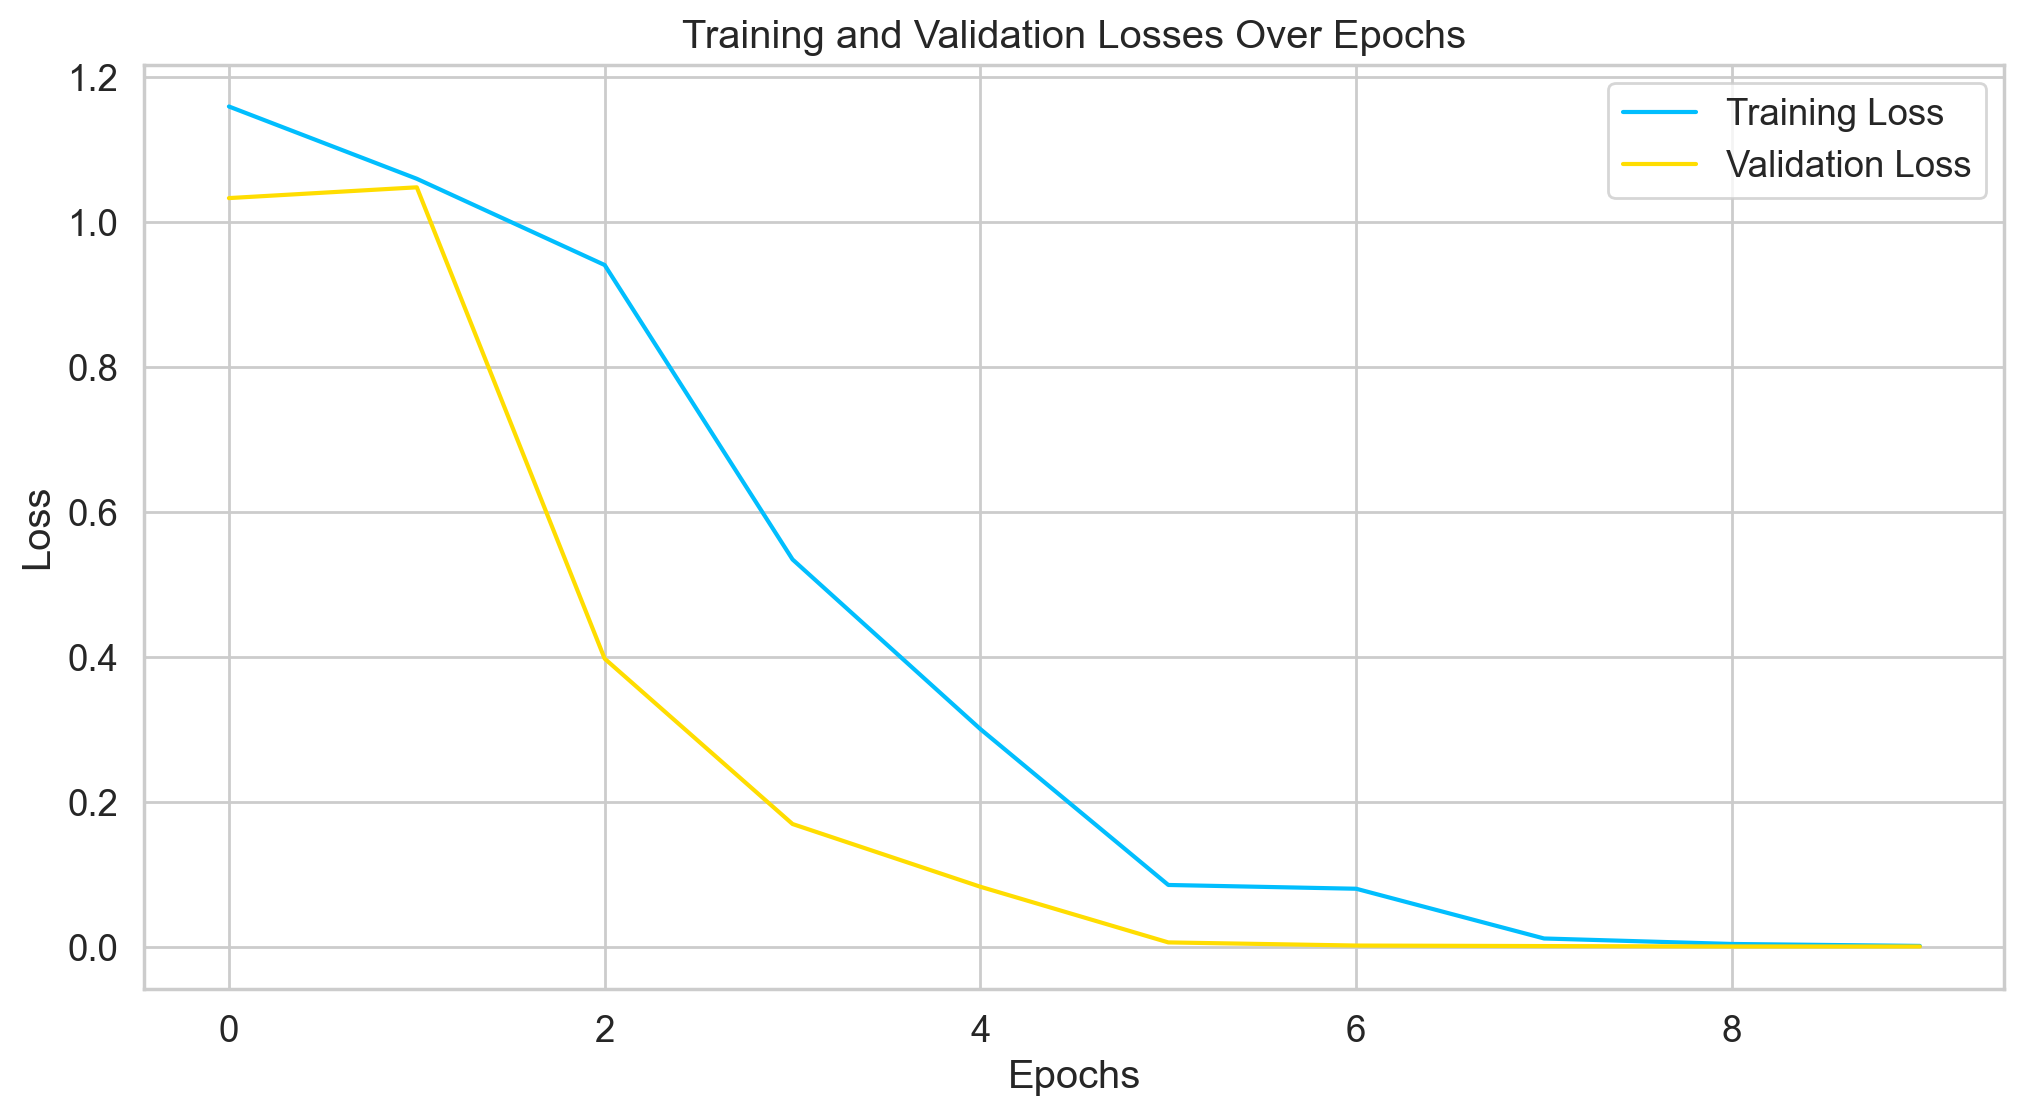

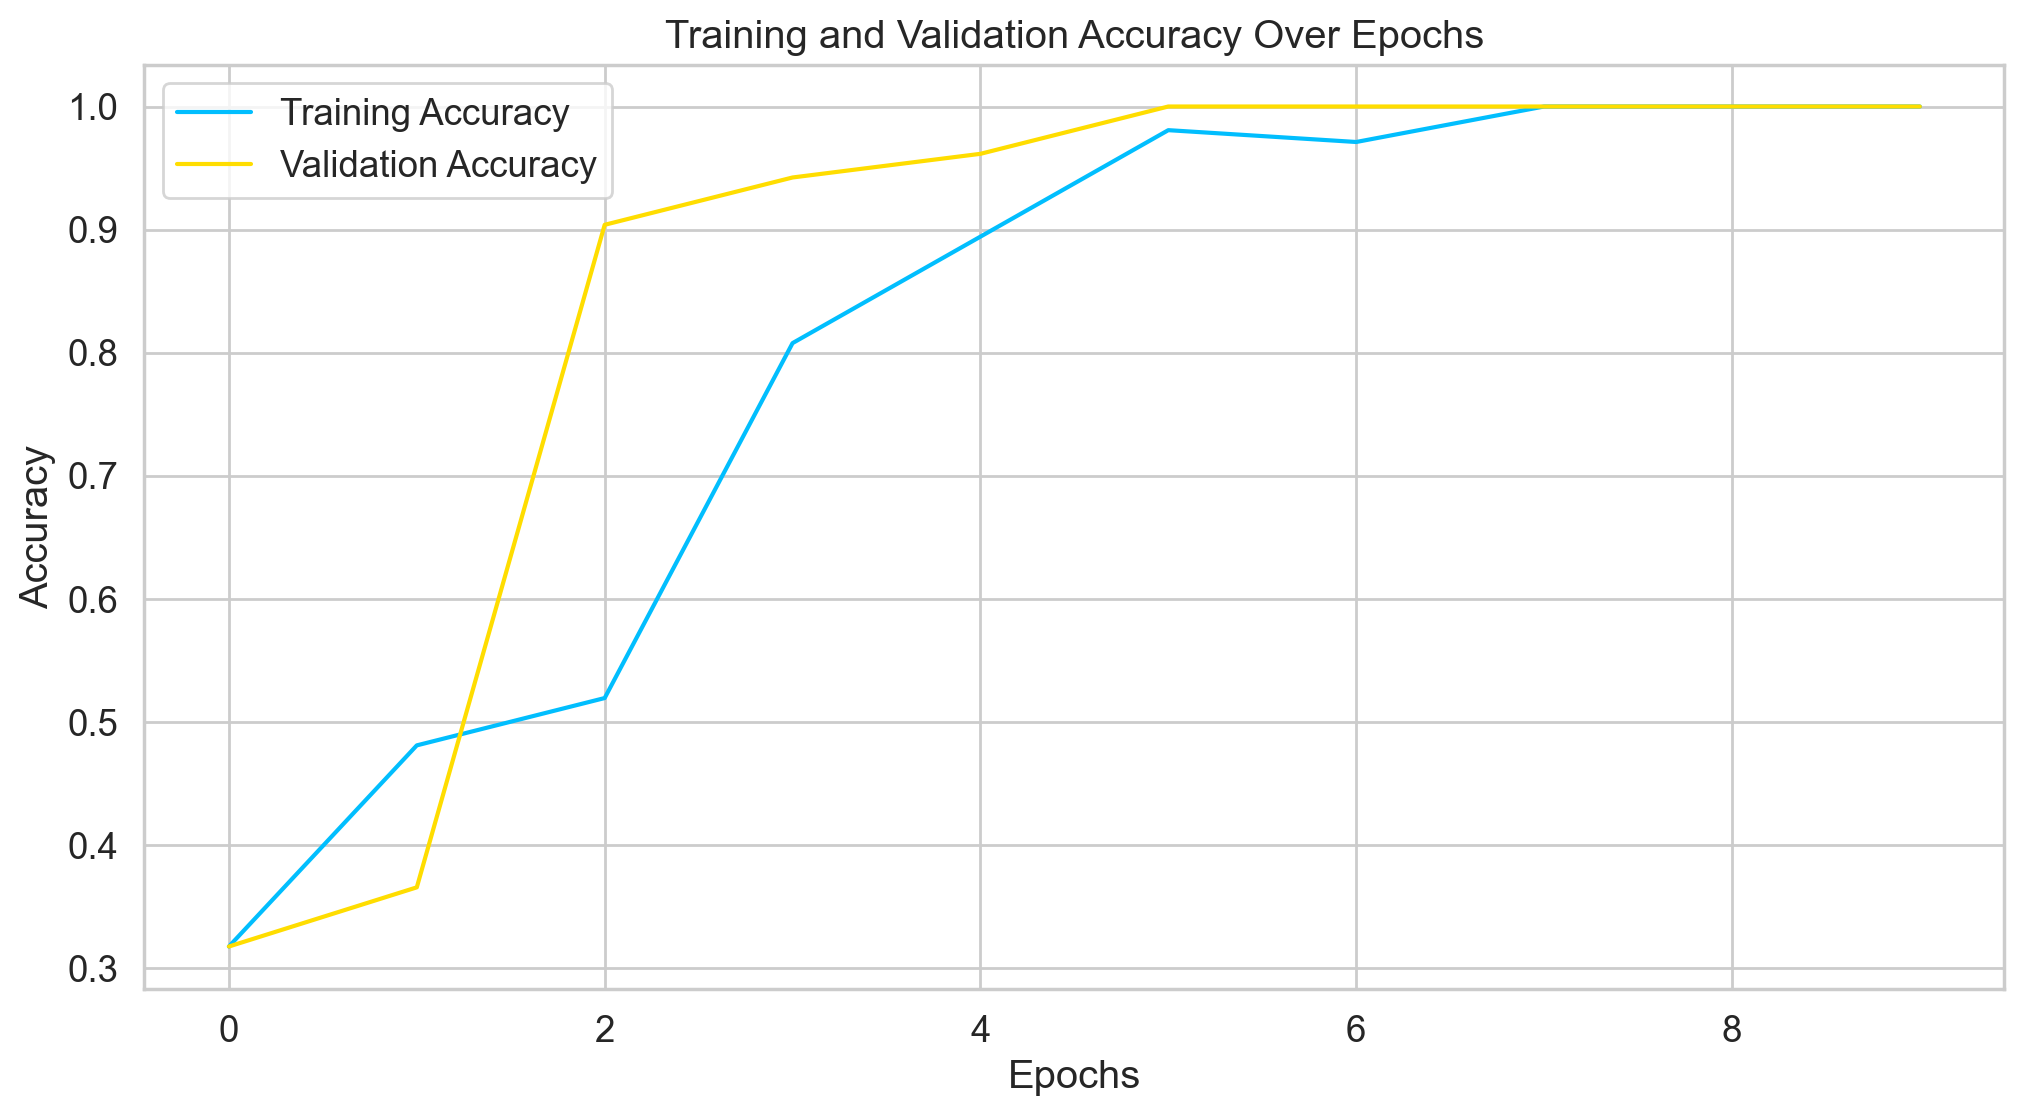

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

## evaluating the model

In [ ]:
model.load_state_dict(torch.load('xlnet_model.bin'))

<All keys matched successfully>

In [ ]:
model = model.to(device)

In [ ]:
test_acc, test_loss = eval_model(
  model,
  test_data_loader,
  device,
  len(ps_test)
)

print('Test Accuracy :', test_acc)
print('Test Loss :', test_loss)

Test Accuracy : 1.0
Test Loss : 0.005891347030858294


In [ ]:
def get_predictions(model, data_loader):
    model = model.eval()

    post_titles = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:

            texts = d["post_text"]
            input_ids = d["input_ids"].reshape(4,MAX_LEN).to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)

            loss = outputs[0]
            logits = outputs[1]

            _, preds = torch.max(outputs[1], dim=1)

            probs = F.softmax(outputs[1], dim=1)

            post_titles.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    return post_titles, predictions, prediction_probs, real_values

In [ ]:
y_post_titles, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Israel       1.00      1.00      1.00        39
     Neutral       1.00      1.00      1.00        33
   Palestine       1.00      1.00      1.00        32

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



## Raw text to stance using trained model

In [ ]:
def predict_stance(text):
    post_title = text

    encoded_title = tokenizer.encode_plus(
    post_title,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    padding='max_length',
    return_attention_mask=True,
    return_tensors='pt',
    )

    input_ids = pad_sequences(encoded_title['input_ids'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    input_ids = input_ids.astype(dtype = 'int64')
    input_ids = torch.tensor(input_ids)

    attention_mask = pad_sequences(encoded_title['attention_mask'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    attention_mask = attention_mask.astype(dtype = 'int64')
    attention_mask = torch.tensor(attention_mask)

    input_ids = input_ids.reshape(1,MAX_LEN).to(device)
    attention_mask = attention_mask.to(device)
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs[0]
    probs = F.softmax(logits, dim=-1).cpu().numpy()[0]
    prediction = torch.argmax(logits, dim=-1).cpu().numpy()[0]

    """
    print(f"Review text: {text}")
    for i, class_name in enumerate(class_names):
        print(f"{class_name} score: {probs[i]:.4f}")
    print(f"Predicted class: {class_names[prediction]}")
    """

    return int(prediction)

example

In [ ]:
title = "The fate of many Gazans lies with the Rafah crossing, and Egypt."
print(predict_stance(title))

1


**Now that we have a trained model that can tell us what the event in the title is in favor of, we can collect results from the title of each post.**

In [ ]:
df['is_first_occurrence'] = ~df.duplicated(subset='Cleaned_Title')


for index, row in df[df['is_first_occurrence']].iterrows():
    prediction = predict_stance(row['Cleaned_Title'])  # Replace with your actual prediction call
    df.at[index, 'Event_Benefactive'] = prediction

df.loc[~df['is_first_occurrence'], 'Event_Benefactive'] = None

df.drop(columns=['is_first_occurrence'], inplace=True)

### Iterating over the cleaned dataset to get the general sentiment of each post

In [ ]:
# Sentiment mapping
def sentiment_to_numeric(label):
    mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    return mapping.get(label, 0)

# One iteration over the whole corpus to get the general sentiment of each post
current_post_sentiment = 0
start_of_post_index = None
for index, row in df.iterrows():
    if pd.notna(row['Event_Benefactive']):
        if start_of_post_index is not None:
            df.at[start_of_post_index, 'General_Sentiment'] = current_post_sentiment
        start_of_post_index = index
        current_post_sentiment = 0

    current_post_sentiment += sentiment_to_numeric(row['Sentiment_Label']) * row['Upvotes']

# Handle the last post
if start_of_post_index is not None:
    df.at[start_of_post_index, 'General_Sentiment'] = current_post_sentiment

# Fill NaN values in 'General_Sentiment' with 8
df['General_Sentiment'].fillna(8, inplace=True)

### visualization of the general sentiment w.r.t the benefactive of the post event.

/var/folders/0v/5332h4d15q7cn_5xwjtkv2840000gn/T/ipykernel_25951/4263844782.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palestine_df['Capped_Sentiment'] = cap_values(palestine_df['General_Sentiment'], cap_value)
/var/folders/0v/5332h4d15q7cn_5xwjtkv2840000gn/T/ipykernel_25951/4263844782.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  israel_df['Capped_Sentiment'] = cap_values(israel_df['General_Sentiment'], cap_value)
/var/folders/0v/5332h4d15q7cn_5xwjtkv2840000gn/T/ipykernel_25951/4263844782.

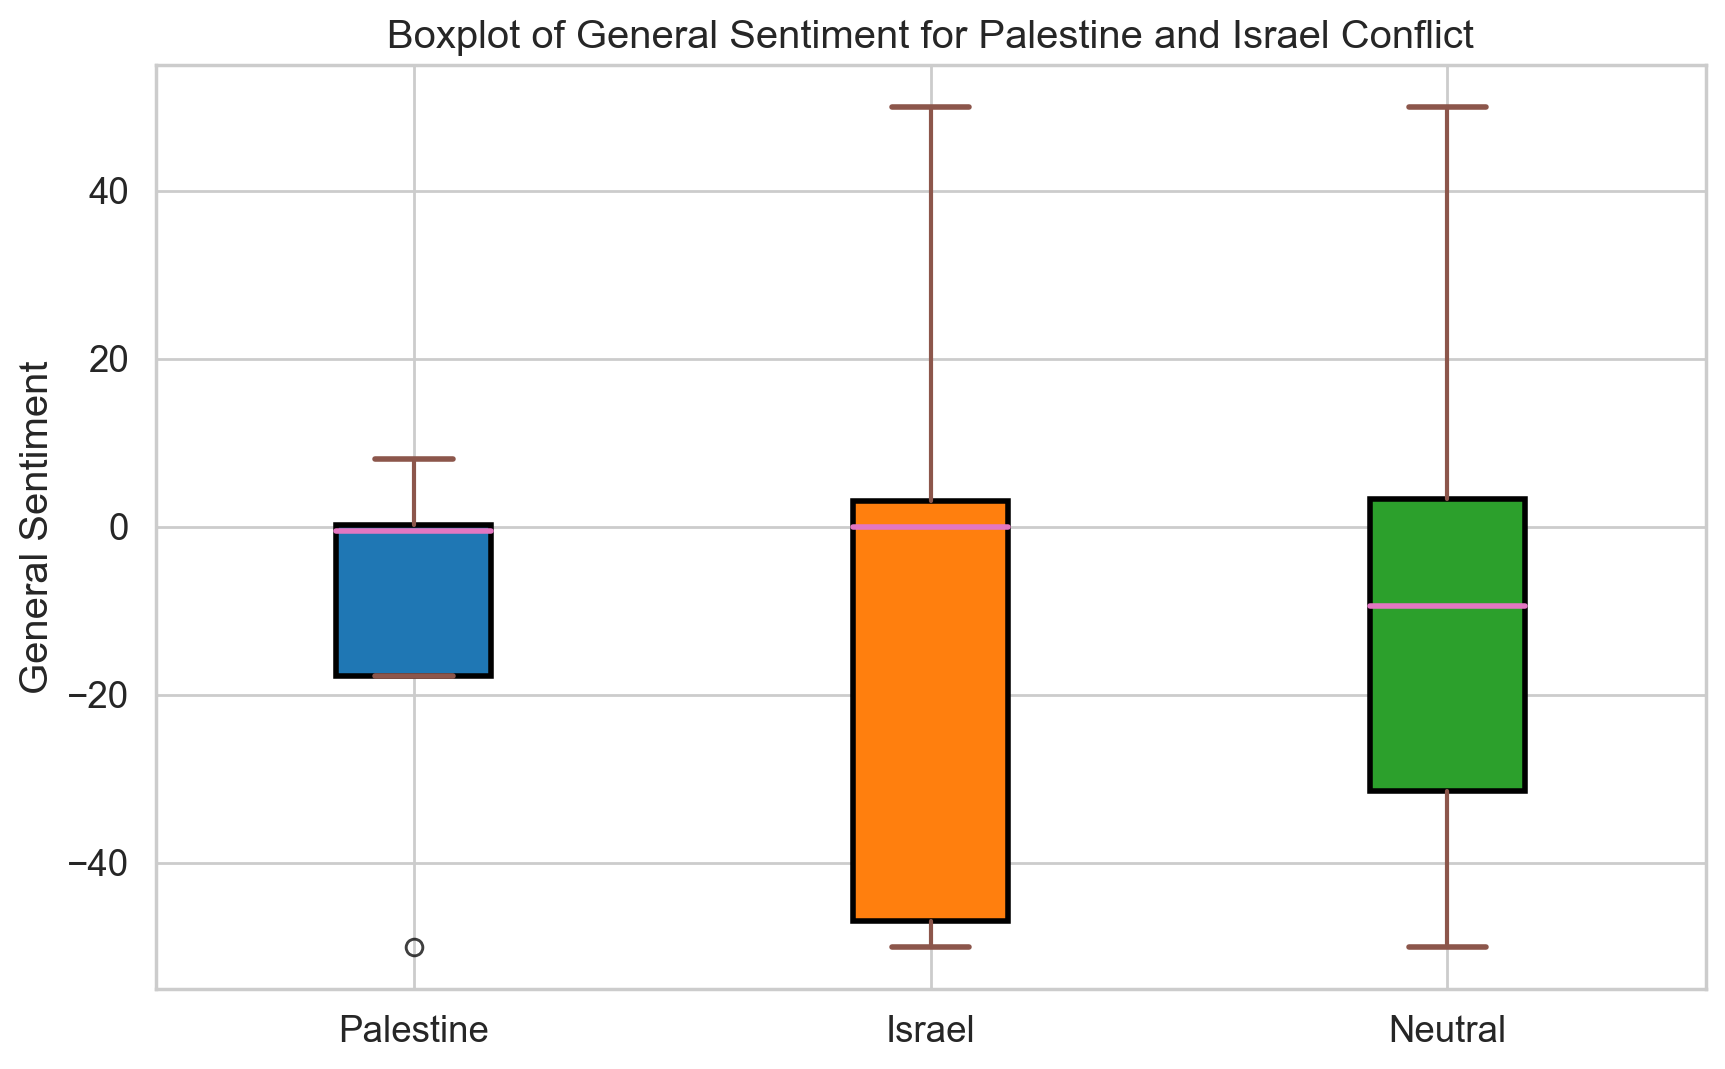

[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END ...max_depth=20, max_features=auto, n_estimators=50; total time=   0.6s
[CV] END ..max_depth=20, max_features=auto, n_estimators=200; total time=   2.6s
[CV] END ..max_depth=10, max_features=auto, n_estimators=200; total time=   1.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=30, max_features=auto, n_estimators=100; total time=   1.9s
[CV] END ...max_depth=10, max_features=auto, n_estimators=50; total time=   0.4s
[CV] END ..max_depth=10, max

In [ ]:
filtered_df = df[pd.notna(df['Event_Benefactive'])]

# Separate the data into different categories
palestine_df = filtered_df[filtered_df['Event_Benefactive'] == 2]
neutral_df = filtered_df[filtered_df['Event_Benefactive'] == 1]
israel_df = filtered_df[filtered_df['Event_Benefactive'] == 0]

def cap_values(series, cap):
    return series.clip(lower=-cap, upper=cap)

cap_value = 50
# Set this based on your data analysis
palestine_df['Capped_Sentiment'] = cap_values(palestine_df['General_Sentiment'], cap_value)
israel_df['Capped_Sentiment'] = cap_values(israel_df['General_Sentiment'], cap_value)
neutral_df['Capped_Sentiment'] = cap_values(neutral_df['General_Sentiment'], cap_value)

# Plot with the capped values


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Data to plot
data_to_plot = [
    palestine_df['Capped_Sentiment'],
    israel_df['Capped_Sentiment'],
    neutral_df['Capped_Sentiment']
]

# Creating the boxplot with custom colors and styles
box = plt.boxplot(data_to_plot, patch_artist=True, labels=['Palestine', 'Israel', 'Neutral'])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors for the boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_linewidth(2)

# Customizing the whiskers, caps, and medians
for whisker in box['whiskers']:
    whisker.set(color='#8c564b', linewidth=1.5)

for cap in box['caps']:
    cap.set(color='#8c564b', linewidth=2)

for median in box['medians']:
    median.set(color='#e377c2', linewidth=2)

# Customizing the fliers (outliers)
for flier in box['fliers']:
    flier.set(marker='o', color='#7f7f7f', alpha=0.5)

plt.ylabel('General Sentiment')
plt.title('Boxplot of General Sentiment for Palestine and Israel Conflict')

plt.show()
